<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>


<center><h1><font size=6>Chapter 2</font></h1></center>
<center><h1><font size=7>Model Basics</h1></center>

By Dr. Laurie Baker and Dr. Daniel J. Lewis

# Introduction

 * Ideally your model will capture `signals` (i.e. patterns) generated by the phenomenom of interest and ignore `noise` (i.e. random variation) you're not interested in. 
 
 * In model basics you will learn how models work mechanistically, focussing on the important family of linear models. 
 
**Hypothesis generation vs. hypothesis confirmation**

  * Traditionally, one of the focuses of modelling is on **inference**, or confirming that a hypothesis is true. To do it correctly you need to know two things:
  
    1. Each observation can either be used for exploration or confirmation, not both. 
    2. You can use an observation as many times as you like for exploration, but you can only use it once for confirmation. As soon as you use an observation twice, you've switched from confirmation to exploration. 
    
* Note, that in order to confirm a hypothesis, you must use data independent of the data used to generate the hypothesis.


## Learning Objectives

By the end of Chapter 2, learners should know:

*   Model Basics
    *	 What is a model family and fitted model?
    *	 What is the difference between a response and an explanatory variable?
    
*   Model Construction
    *  How to construct a linear model in python?
    *  What are the slope and intercept in a linear model?
    *  Picking out key information from the model table
    *  How to extract specific parameters from the model object.

*  Assessing Model Fit
    *	 How to inspect model residuals to assess model fit?
    *	 How to pick out key information from the table from a fitted model. 
    *  How to use Adjusted R-squared and AIC to compare models. 

**Packages Needed**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualisation and plotting
import statsmodels.api as sm # statistical modelling package
import statsmodels.formula.api as smf # statistical modelling package with R-like formulas
import scipy.stats as stats # statistical modelling package
import math # mathematical expressions

from sklearn import linear_model # fetching iris dataset and linear model functions
from sklearn.metrics import mean_squared_error, r2_score # packages to inspect residuals and Adjusted R^2

# Seaborn style default change
plt.style.use('ggplot')

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# supress warnings due to different versions of packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# set plots to show inline
%matplotlib inline

# Chapter 2: Model Basics

## Introduction

 * Ideally your model will capture `signals` (i.e. patterns) generated by the phenomenom of interest and ignore `noise` (i.e. random variation) you're not interested in. 
 
 * In model basics you will learn how models work mechanistically, focussing on the important family of linear models. 


## Model basics

One of the goals of models is to partition data into patterns and residuals. Strong patterns will hide subtler trends. We can use models to peel back layers of structure as we explore a dataset. 

There are 2 key parts to a model, the family of models and the fitted model.
 

 1. **Family of models**
    * define a family of models that express precise, but generic pattern you wish to capture. For example, a straight line $y = ax + b$ or quadratic curve $y = ax^2 + bx + c$. Where $x$ and $y$ are known variables from your data, and $a$, $b$, and $c$ are parameters that can vary to capture different patterns. These formulas are simple to capture in python 
    
    <br>

<img src="../../images/clothesline.jpg"  width="800" height="800" alt="A clothesline with different pieces of clothing hanging.">

Image Credit: [Clothesline](https://www.flickr.com/photos/34379543@N06/3468402366) by [Frau Heimlich](https://www.flickr.com/photos/34379543@N06) is licensed under [CC BY-NC-SA 2.0](https://creativecommons.org/licenses/by-nc-sa/2.0/?ref=ccsearch&atype=rich)



<br>

 2. **Fitted model**
    * After you've chosen your model family, the next step is to generate a fitted model from that family that is closest to your data. 
    * the **model family** is expressed as an equation, where the different parameters are able to take on different values to adjust the shape of the fitted line to the data.
    
    <br>
    
<img src="../../images/tailor_fit.jpg"  width="600" height="600" alt="Tailor fitting a suit.">

Image Credit: [John Boyer Bespoke Suit Tailors](https://www.behance.net/gallery/30289889/John-Boyer-Bespoke-Suit-Tailors) by Shayna Grosh is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/?ref=ccsearch&atype=rich)


<br>

Note, it is important to understand that a fitted model is just the closest model from a family of models. What is "best" is determined according to some criteria, which we will discuss later.  

**Clothes as an analogy**

If we use clothes as an analogy, the **family of models** is like an assortment of garments you could choose to 'clothe' the data in. Just as some clothes will be more suitable than others depending on what you wish to do (e.g. nice outfit for a wedding), the same is true for models. The type of model will depend on the type of data you have and what you wish to do with your analysis. 

**Model fitting** is similar to getting a garment tailored. Just as you might make alterations to improve the fit of a garment, you will adapt the chosen model to get a better fit to the data. 


<div class="alert alert-block alert-success">
<b><font size="4"> Terminology</font> </b> 
<p> 

In the field of data science you will see a number of terms used to refer to the same things. Here, we will use `response variable` to refer to the measured variable you are trying to explain. 

We will use `explanatory variables` to refer to the measured variables that we use to try to explain the response variable. Other terms that you may come across for these concepts include:

* **response variable**: `dependent`, `target` (machine learning) 

* **explanatory variables**: `independent`, `features` (machine learning)

</p>
</div>



## Linear Models

Linear regression is one of the most important and widely used regression techniques. Its main advantage is its simple structure and ease of interpreting results.

Linear models take the mathematical form:

$y = ax + b$

where $y$ is the response variable, $a$ is the slope that quantifies the change in $y$ with increases in the dependent variable $x$, and $b$ is the intercept.



### **What influences a professor's salary?**

In this chapter, we're going to explore the question, what influences a professor's salary? 

Our data consists of the salaries of individual professors from 5 departments within the University: english, informatics, statistics, biology, and sociology. The data contains the following variables

* `ids` = individual id
* `department` = university department
* `bases` = the starting salary
* `experience` = years of experience
* `raises` = raise per year
* `salary` = current salary

We're interested in exploring the questions "What influences a professor's salary?". We have a hunch that it might depend on years of experience and that it could be different across departments. 

In [2]:
# read in the salary data
salaries = pd.read_csv("../../data/faculty-data.csv") 

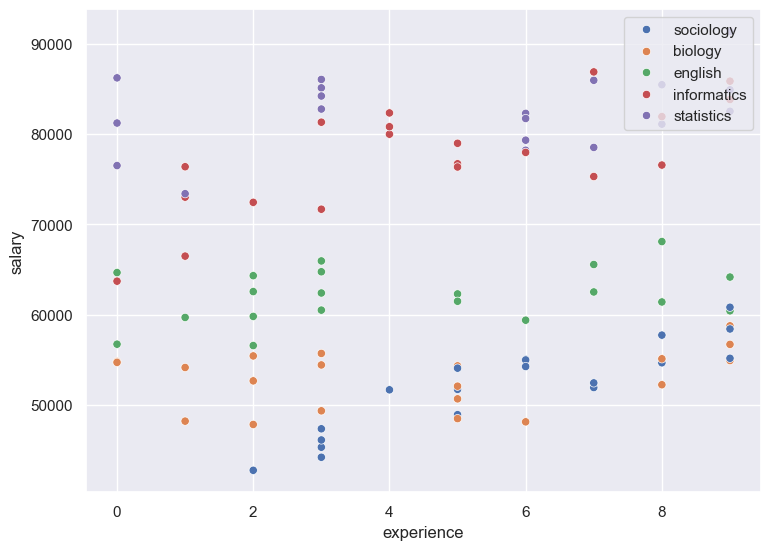

In [3]:
# Using the scatterplot function we can create a scatterplot of salary and experience
# to explore this relationship with department in more detail.

salaries_scatter = sns.scatterplot(data=salaries,
                                   x='experience',
                                   y='salary',
                                   hue='department')
plt.legend(loc='upper right');

<div class="alert alert-block alert-success">
<b><font size="4">Exercise:</font></b> 

<p> 

1. What kind of relationship do you see between years of experience and salary? How does salary change with years of experience? Does it vary by department?

</p> </div>



In [ ]:
# %load "./Solutions/ex2.1.py"
# From the plot it looks like there is a positive relationship between the salary an individual receives and the years of experience they have. That is as the years of experience they have increases the salary also increases. 

# While the relationships looks positive within departments, the strength of the relationships look different for each department. 

Let's use a model to capture the pattern and make it more explicit. In this case, the relationship looks linear so we can use the form: $y = ax + b$. We are interested in how an individual's salary changes with experience. 

We can make a guess at what the parameters for a and b might be. It looks like the starting salary (intercept) could be around $b = 60000$ USD, with the salary increasing with each year of experience by $a = 1500$ USD, effectively a 1500 USD raise per year!

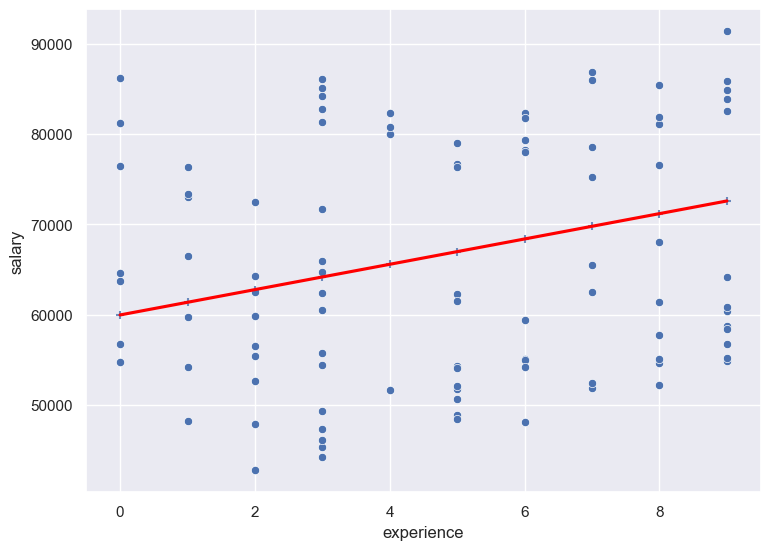

In [4]:
salaries_scatter = sns.scatterplot(data=salaries,
                                   x='experience',
                                   y='salary')

x = np.arange(10)  # explanatory variable: years of experience for the x-axis
a = 1400  # slope: the rate at which the salary increases per year of experience
b = 60000  # intercept: the starting salary
y = a*x + b  # predicted salary: predicted salary based on years of experience.


salaries_scatter = sns.regplot(x=x,
                               y=y,
                               marker="+",
                               line_kws={"color": "red"})
salaries_scatter.set(xlim=(-0.5, 9.5));

Not bad, but maybe we could do a bit better

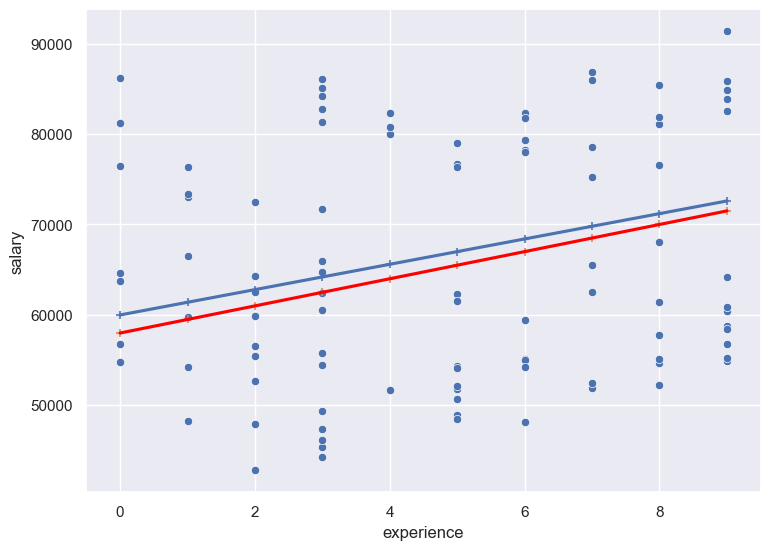

In [5]:
salaries_scatter = sns.scatterplot(data=salaries,
                                   x='experience',
                                   y='salary')

x = np.arange(10)  # explanatory variable: years of experience for the x-axis
a0 = 1400  # slope 1: the rate at which the salary increases per year of experience
a1 = 1500  # slope 2: the rate at which the salary increases per year of experience

b0 = 60000  # intercept 1: the starting salary
b1 = 58000  # intercept 2: the starting salary

y0 = a0*x + b0  # predicted salary 1
y1 = a1*x + b1  # predicted salary 2

# First regression line
salaries_scatter = sns.regplot(x=x, y=y0, marker="+")

# Second regression line
salaries_scatter = sns.regplot(x=x, 
                               y=y1, 
                               marker="+", 
                               line_kws={"color": "red"})

salaries_scatter.set(xlim=(-0.5,9.5));

<div class="alert alert-block alert-success">
<b><font size="4">Exercise:</font></b> 

<p> 

1. Your turn, what values would you put for the slope (a2) and the intercept (b2)? Fill in the blanks below to create your own line.

</p> </div>

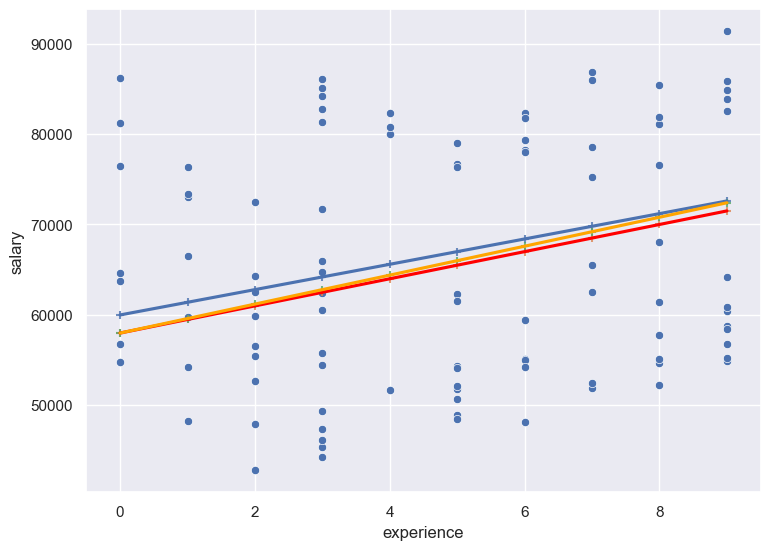

In [6]:
salary_scatter = sns.scatterplot(data=salaries, 
                                 x='experience', 
                                 y='salary')

x = np.arange(10) # explanatory variable: years of experience for the x-axis
a0 = 1400 # slope 1: the rate at which the salary increases per year of experience
a1 = 1500 # slope 2: the rate at which the salary increases per year of experience
a2 = 1600     # slope 3: ""

b0 = 60000 # intercept 1: the starting salary
b1 = 58000 # intercept 2: the starting salary
b2 = 58000      # intercept 3: ""

y0 = a0*x + b # predicted salary 1
y1 = a1*x + b1 # predicted salary 2
y2 = a2*x + b2 # predicted salary 3

# First regression line
salary_scatter = sns.regplot(x=x, 
                             y=y0, 
                             marker="+")

# Second regression line
salary_scatter = sns.regplot(x=x, 
                             y=y1, 
                             marker="+", 
                             line_kws={"color": "red"})

# Third regression line
salary_scatter = sns.regplot(x=x, 
                             y=y2, 
                             marker="+", 
                             line_kws={"color": "orange"})

salary_scatter.set(xlim=(-0.5,9.5));

In [ ]:
# %load "./Solutions/ex2.2.py"
salary_scatter = sns.scatterplot(data=salaries, 
                                 x='experience', 
                                 y='salary')

x = np.arange(10) # explanatory variable: years of experience for the x-axis
a0 = 1400 # slope 1: the rate at which the salary increases per year of experience
a1 = 1500 # slope 2: the rate at which the salary increases per year of experience
a2 = 1600 # slope 3: ""

b0 = 60000 # intercept 1: the starting salary
b1 = 58000 # intercept 2: the starting salary
b2 = 59000 # intercept 3: ""

y0 = a0*x + b # predicted salary 1
y1 = a1*x + b1 # predicted salary 2
y2 = a2*x + b2 # predicted salary 3

# First regression line
salary_scatter = sns.regplot(x=x, 
                             y=y0, 
                             marker="+")

# Second regression line
salary_scatter = sns.regplot(x=x, 
                             y=y1, 
                             marker="+", 
                             line_kws={"color": "red"})

# Third regression line
salary_scatter = sns.regplot(x=x, 
                             y=y2, 
                             marker="+", 
                             line_kws={"color": "orange"})

salary_scatter.set(xlim=(-0.5,9.5));

As you can see by now, all three lines have slightly different parameters. It is difficult to tell by eye which line fits the data better. We could do this ourselves, by measuring the `residuals`, the distance from the data (actual response) to the line (predicted response), for each model, and comparing them. But this can be time-consuming, especially if our goal is to find the best model which could involve looking at more than just two models! 


Luckily python has built-in functions that will explore all the possibilities to find the 'best' line. In linear regression, one of the ways to define the 'best' line is by finding the line that minimizes the sum of squared residuals (aka sum of squares). 

Calculating the sum of squared residuals involves taking the residual distances, squaring them, and summing them. This approach is also called Ordinary Least Squares (OLS), after which the OLS function in python takes its name. 

## Model Construction

Here we use the `statsmodels function api` to construct our models. This allows us to specify an intuitive model formula for our analyses where: 

`formula = y ~ x`. 

In this case `y` is our response variable, the tilde `~` means "depends on" `x`, which represents an explanatory variable (i.e. the variable we are using to try to explain the variation in `y`). 

### Model 1: Continuous Variable

**Hypothesis**: The relationship between salary and experience is the same across all departments.

Let's take a look at what this looks like in practice. In this case we're interested in explaining the variation in `salary` using the explantory variable, `experience`.

Note that the `smf.ols` function automatically includes the intercept in the model, so we don't have to specify one.


In [7]:
model1 = smf.ols(formula='salary ~ experience', 
                 data=salaries)

results_mod1 = model1.fit()

print(results_mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.238
Date:                Thu, 11 Jan 2024   Prob (F-statistic):              0.138
Time:                        14:10:26   Log-Likelihood:                -1089.2
No. Observations:                 100   AIC:                             2182.
Df Residuals:                      98   BIC:                             2188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.215e+04   2564.318     24.238      0.0

The summary gives us a range of diagnostic information about the model we've fitted, split into three tables. Here's a quick guide on what is included:

**Top Table - model fit info.**

  * **R-squared/Adj. R-squared** - The proportion of the variance in the response variable ('salary') explained by the model. The Adj. R-squared takes into account the number of variables in the model.
  * **No. of Observations** (i.e. measurements of 'salary') and  **Df** degrees of freedom (No. of Observations - (1 + No. of variables in the model)).
  * **General info** - date and time that model was run, type of model etc.
  * **Model Fit info** - inc. **F-statistic**, **AIC** and **BIC**, **Log-Likelihood**. They are not meaningful on their own, but allow you to compare different models to assess the best one. 
    
**Middle Table - an important table!**

  * **coef** = coefficient estimates for the intercept and explanatory variables.
  * **std err** = standard errors (i.e. estimate of the uncertainty) of the coefficient estimates.
  * **t** = t-statistic for the t-test comparing whether the coefficient is different to 0.
  * **P>|t|** = p-value for the t statistics, giving significance of coefficient.
  * **[0.025 0.975]** = 95% confidence interval around the coefficient estimate.
    
**Bottom table - Diagnostics**

  * **Jarque-Bera**, **Omnibus**: test normality of residuals.
  * **Cond, No.**: Condition Number, test for multicollinearity.
  * **Durbin-Watson**: test for autocorrelation.


As you can see, there is a lot of information in the summary. Let's focus on a few relevant values from the model in the table to focus on.

* The Adjusted R^2
* Intercept coefficient
* Slope coefficient (i.e. experience in the table)

We can also get these specific parameters directly from the `model` object. The `params` attribute of the model is a dictionary, we can look at it's different keys to access values.

Such as the `Intercept`, `Slope`, `R-squared`


In [8]:
## Extracting the intercept

print("Intercept =", results_mod1.params['Intercept'])


## Extracting the slope

print("(experience) coef. =", results_mod1.params['experience'])


## Extracting the R-squared

print("R^2 =", results_mod1.rsquared_adj)


Intercept = 62154.02335773206
(experience) coef. = 683.479353392566
R^2 = 0.012348448482915608


**Model interpretation**

* **Intercept:** The base salary from the line of best fit was 62154.02 USD
* **Slope:** The rate at which salary increases with experience was estimated to be 683.47 USD per year based on the line of best fit.
* **Overall fit:** The model fit was poor, only explaining 1.2% of the variation in individual's salaries. 

## Constructing the line of best fit

The code above is a useful way to pull out information to further analyse or include in reports. We can pull out these coefficients to plot our line of best fit and compare this to the lines we estimated by eye.

We can do this by creating a scatterplot of the line of best fit from our model compared to two different slopes and intercepts to describe the relationship between salary and experience.

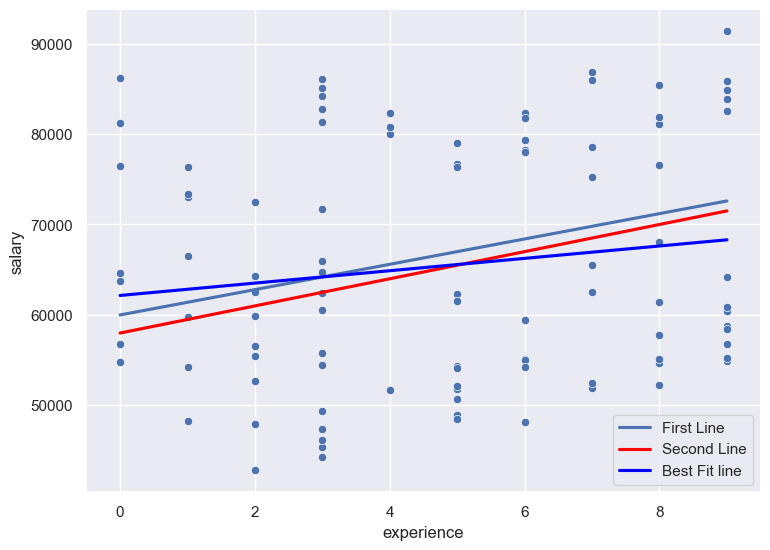

In [9]:
salary_scatter = sns.scatterplot(data=salaries, 
                                 x='experience', 
                                 y='salary')

x = np.arange(10) # explanatory variable: years of experience for the x-axis
a = 1400 # slope 1: the rate at which the salary increases per year of experience
a1 = 1500 # slope 2: the rate at which the salary increases per year of experience
a2 = results_mod1.params['experience'] # slope 3: the estimated ""

b = 60000 # intercept 1: the starting salary
b1 = 58000 # intercept 2: the starting salary
b2 = results_mod1.params['Intercept'] # intercept 3: the estimated ""

y = a*x + b # predicted salary 1
y1 = a1*x + b1 # predicted salary 2
y2 = a2*x + b2 # predicted salary 3


salary_scatter = sns.regplot(x=x, y=y, marker="+", scatter=False, label="First Line")
salary_scatter = sns.regplot(x=x, y=y1, marker="+", scatter=False, line_kws={"color": "red"}, label="Second Line")
salary_scatter = sns.regplot(x=x, y=y2, marker="+", scatter=False, line_kws={"color": "blue"}, label="Best Fit line")
salary_scatter.legend()
salary_scatter.set(xlim=(-0.5,9.5));

We can do this plot by hand (as above) or directly from our model including the confidence intervals. 

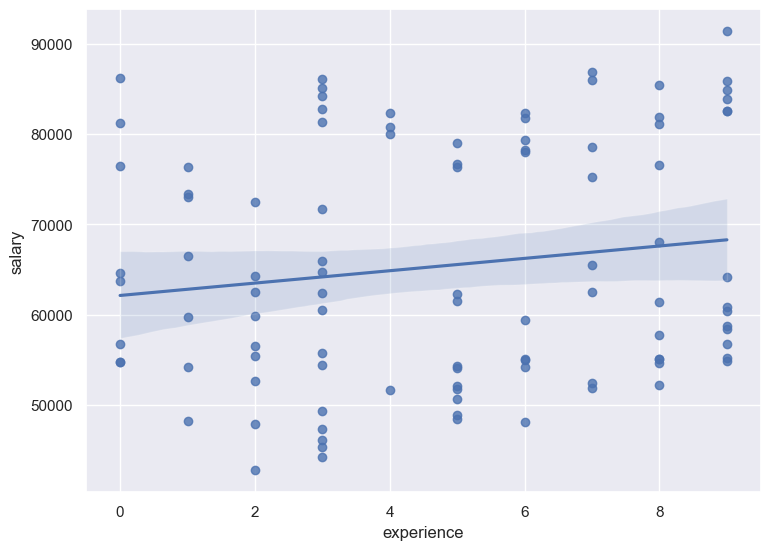

In [10]:
# Scatterplot and line of best fit
# note that using seaborn for this doesn't give us
# as much statistical information

salary_best_fit = sns.regplot(data=salaries,
                              x='experience',
                              y='salary',
                              ci=95) # we can specify the confidence interval

salary_best_fit.set(xlim=(-0.5,9.5));

<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

1. What does the fact that most of the salaries fall outside the confidence intervals (shaded area) tell us?

</p>
</div>



In [ ]:
# %load "./Solutions/ex2.3.py"
# The fact that most of the data points fall outside the confidence intervals (shaded area) reflects that our line of best fit does a poor job of capturing the variation in faculty salaries. The predicted value (our line of best fit) are sometimes over and underestimating faculty salaries by as much as 20,000 dollars. 

**Residuals**

We can get the residuals by substracting the observed values (actual salaries) from the predicted values (predicted salaries) from our line of best fit. This can be plotted by plotting the predicted line, the actual data/salaries. 

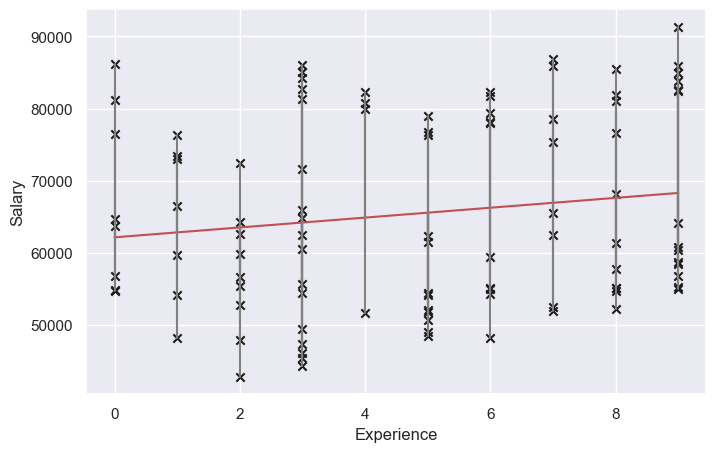

In [11]:
fig, ax2 = plt.subplots(figsize=(8, 5))


# Plot

## The data
x = salaries["experience"]
y = salaries["salary"]

## The fitted line

slope = results_mod1.params['experience']
intercept = results_mod1.params['Intercept']

xfit = np.arange(10)
yfit = slope * xfit + intercept

# plot data
ax2.scatter(x, y, marker='x', color='k')

# plot line of best fit
ax2.plot(xfit, yfit, color='r')


# plot residuals

# The function below creates a vector of the x values and y values 
# for the predicted and actual data. These will be used to create the error lines.

def residual_line(x, y, slope, intercept):
    xs = [x, x] # x values (experience) for the real and predicted salaries
    ys = [y, (intercept + slope * x)] # y values (salary) for the real and predicted salaries.
    return xs, ys

# Creating the plot
## Constructing the vertical error lines

# extract residual lines
xvalues, yvalues = residual_line(x, y, slope, intercept)

# plot residual lines
errs = ax2.plot(xvalues, yvalues, color='0.5')

ax2.set_xlabel("Experience", fontsize=12) # x-axis label
ax2.set_ylabel("Salary", fontsize=12); # y-axis label

We can calculate the residuals to look at the actual vs predicted values and plot these on a graph

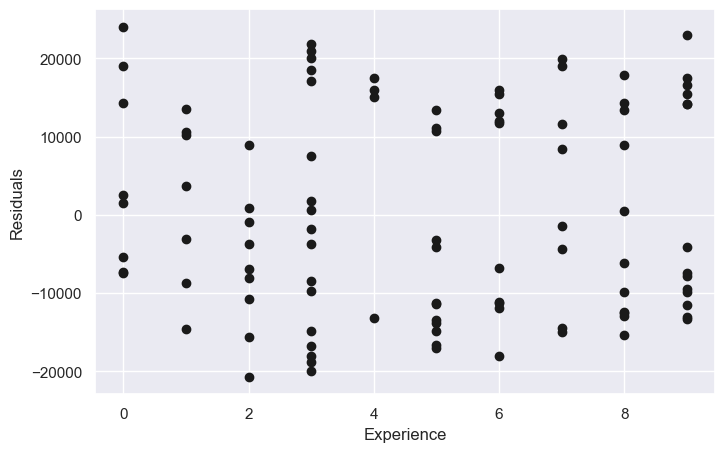

In [12]:
# the actual salary
actual = salaries["salary"] 

# the predicted salary
predicted = results_mod1.params['experience'] * salaries["experience"] + results_mod1.params['Intercept']

# difference between the actual and predicted salary
difference = actual - predicted

# years of experience to go on the x-axis
x = salaries["experience"]

fig, resid_plot = plt.subplots(figsize=(8,5))

resid_plot.scatter(x, difference, marker='o', color='k')
resid_plot.set_xlabel("Experience", fontsize=12)
resid_plot.set_ylabel("Residuals", fontsize=12);

So what do these residuals mean? Well if we look at the residuals on the y-axis in some cases we are over and underestimating a professor's salary by as much as 20,000 USD. For a large number of individuals we are over and underestimating their salraries between 10,000 and 20,000, which isn't great. We will want to improve our estimates, although the level of error that is acceptable might depend on our stakeholders and how they are going to use this information. 

We can then calculate the root mean squared error by taking the difference squared and then the square root.

In [13]:
# To get the root mean squared error we need to take the difference squared and then the square root.

# squaring the difference. This is also a convenient way
# to get rid of the negative sign and look at how far our line of best fit is from the data,
# regardless of whether the salary was under or overestimated.
difference_squared = difference**2

# We then take the square root to get
# back to the absolute values.
residuals = difference_squared.apply(math.sqrt)

# collect all of the residuals in a sum
residuals.sum()

1168916.8131155875

**Residuals**

We can then inspect the residuals in the model. `Residuals` represent the left over variation in the response variable not explained by the model. A pattern in the residuals may indicate that we are missing a variable or that our assumption of normality is  incorrect. When we are looking at the residuals, we want them to form an 'amorphous cloud', i.e. a cloud shape with no patterns. 


<div class="alert alert-block alert-success">
<b><font size="4"> Residual plots and assumptions </font> </b> 
<p> 
    
* **Residuals vs Fitted:** is used to check the assumptions of linearity. If the residuals are spread equally around a horizontal line without distinct patterns (red line is approximately horizontal at zero), that is a good indication of having a linear relationship.

* **Normal Q-Q:** is used to check the normality of residuals assumption. If the majority of the residuals follow the straight dashed line, then the assumption is fulfilled.

* **Scale-Location:** is used to check the homoscedasticity of residuals (equal variance of residuals). If the residuals are spread randomly and you see a horizontal line with equally (randomly) spread points, then the assumption is fulfilled. 

* **Residuals vs Leverage:** is used to identify any influential value in our dataset. Influential values are extreme values that might influence the regression results when included or excluded from the analysis. Look for cases outside of a dashed line. 

</p>
</div>

We will be focusing today on residuals vs. fitted and the Normal Q-Q plot. 



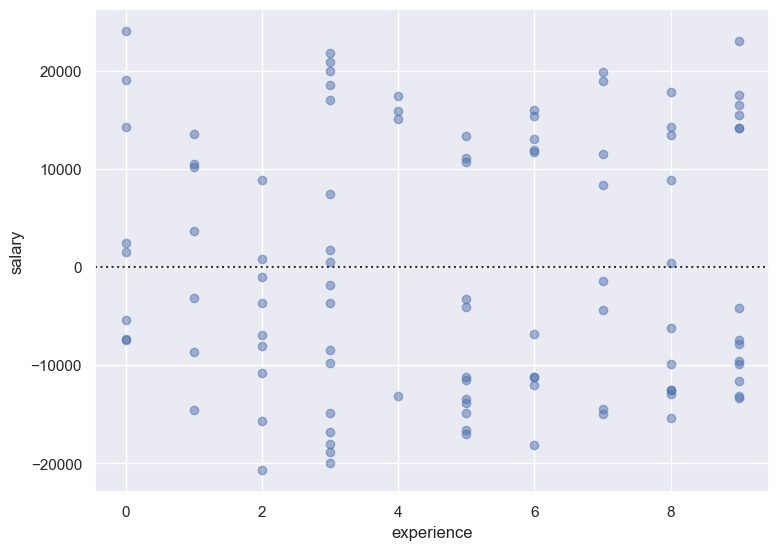

In [14]:
salaries_resid = sns.residplot(data=salaries,
                               y='salary', 
                               x='experience',
                               scatter_kws={'alpha':0.5})
salaries_resid;

We can see from the residuals that our estimates are not great. We seem to be doing an equally poor job of under and overestimating the salaries, with slightly more salaries underestimated. 

**Checking for normality of the residuals**

One of the assumptions of a linear model is that the residuals are normally distributed. Note that this does not mean that the response variable needs to come from a normal distribution, just that the residuals (i.e. errors) are normally distributed with some below and some above with most of the residuals being only a little bit off. These values form the peak of the bell curve and are a little closer to the predicted line. Normal distributions are often referred to as bell curves because of their shape. Let's take a look at a normal distribution with mean 0 and variance 1. 

**Normal** 


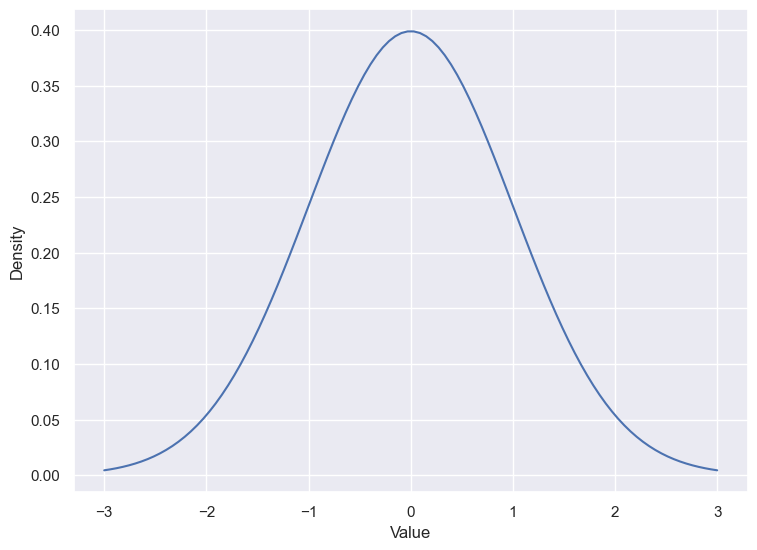

In [15]:
## Inspecting the normal distribution

mu = 0 # the mean, often represented by the greek letter mu.
variance = 1 # the variance, often represented by sigma (std deviation) squared.

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

What you'll notice in the plot above is that it is symmetrical with most values falling close to 0, i.e. most values are not far off from the predicted values but could be a little above (positive) or below (negative). As you get further from the predicted value, the amount of data underneath the curve should be less (less values are way off).  


A common plot used to inspect model residuals is a qqplot. The qqplot compares the residuals to a theoretical normal distribution. If the residuals come from a normal distribution we would expect the blue dots to line up with the red line.

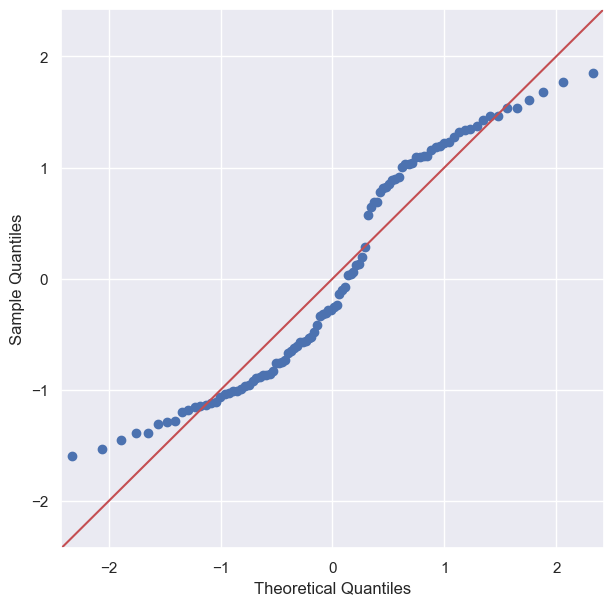

In [16]:
residual = results_mod1.resid

# Use statsmodels qqplot to graph residuals
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))

# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.
sm.graphics.qqplot(residual, line='45', fit=True, ax=ax);

Our plot doesn't look particularly good. Few of the residuals match the red line, and our qqplot plot is slightly s-shaped with more values being under and overestimated than what we would expect as part of a normal distribution. This reflects that our model is a poor fit to our data.  We can see whether including department in the model helps explain some of the remaining variation in the model. 


### Model 2: Continuous and Categorical Variables

**Hypothesis**: Each department has a different starting salary but the increase in salary with experience is the same.

Now we are constructing our model to explain the variation in `salary` using the variables for `experience` and `department`. In this case, because department is a categorical variable we will want to specify it using `C(department)`.




In [17]:
model2 = smf.ols(formula='salary ~ experience + C(department)',
                 data=salaries)

results_mod2 = model2.fit()

print(results_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     222.0
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.97e-50
Time:                        14:29:13   Log-Likelihood:                -962.82
No. Observations:                 100   AIC:                             1938.
Df Residuals:                      94   BIC:                             1953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

There are a few key things to pick out from the table above. First, we have an increase in the adjusted R^2, which is now 0.922, meaning we've explained 92.2 \% of the variation in salary. We also have several parameter estimates now:

 * `Intercept`
 * `C(department)[T.english]`
 * `C(department)[T.informatics]`
 * `C(department)[T.sociology]`
 * `C(department)[T.statistics]`
 * `experience`
 
 
But remember that in our `salaries` dataset there are five departments at the University: 

* biology

* english

* informatics

* sociology

* statistics

Categorical variables always contribute to the intercept in a linear model. When fitting the model, the model function uses the first level of the categorical variable, in this case `biology`, as the baseline `Intercept`. The coefficients estimated for `C(department)[T.english]` and `C(department)[T.informatics]`, and others are estimated in relation to that. 

Let's see how our fit looks when it is plotted.



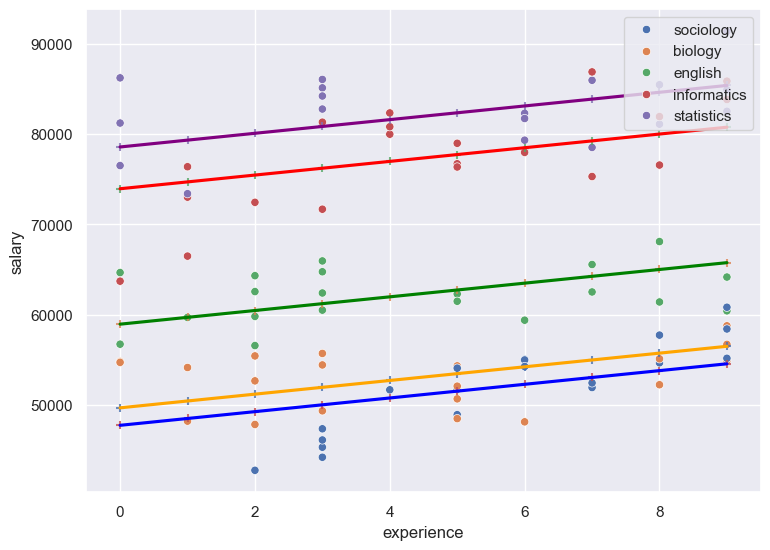

In [18]:
scatter_salaries = sns.scatterplot(data=salaries, 
                                   x='experience', 
                                   y='salary', 
                                   hue='department')

x = np.arange(10)
a = results_mod2.params['experience']

b1 = results_mod2.params['Intercept'] # biology
b2 = results_mod2.params['C(department)[T.english]'] + results_mod2.params['Intercept'] # english
b3 = results_mod2.params['C(department)[T.informatics]']  + results_mod2.params['Intercept'] # informatics
b4 = results_mod2.params['C(department)[T.sociology]'] + results_mod2.params['Intercept'] # sociology
b5 = results_mod2.params['C(department)[T.statistics]']  + results_mod2.params['Intercept'] # statistics

y1= a*x + b1 # biology predicted salaries
y2 = a*x + b2 # economics ""
y3 = a*x + b3 # informationcs ""
y4 = a*x + b4 # sociology ""
y5 = a*x + b5 # statistics ""

# Biology
scatter_salaries = sns.regplot(x=x, 
                               y=y1, 
                               marker="+", 
                               line_kws={"color": "orange"})
# Economics
scatter_salaries = sns.regplot(x=x, 
                               y=y2, 
                               marker="+", 
                               line_kws={"color": "green"})
# Informatics
scatter_salaries = sns.regplot(x=x, 
                               y=y3, 
                               marker="+", 
                               line_kws={"color": "red"})
# Sociology
scatter_salaries = sns.regplot(x=x, 
                               y=y4, 
                               marker="+", 
                               line_kws={"color": "blue"})
# Statistics
scatter_salaries = sns.regplot(x=x, 
                               y=y5, 
                               marker="+", 
                               line_kws={"color": "purple"})



scatter_salaries.set(xlim=(-0.5,9.5))
plt.legend(loc='upper right');

As you can see from the plot above, all of the lines have the same slope so that they are parallel to one another. The only thing that changes is the intercept which moves the fitted line up or down.

Let's see what the residuals look like for our new model.

Intercept = 47800.20186457721
(experience) coef. = 755.5152142855056
R^2 = 0.9177865863237862


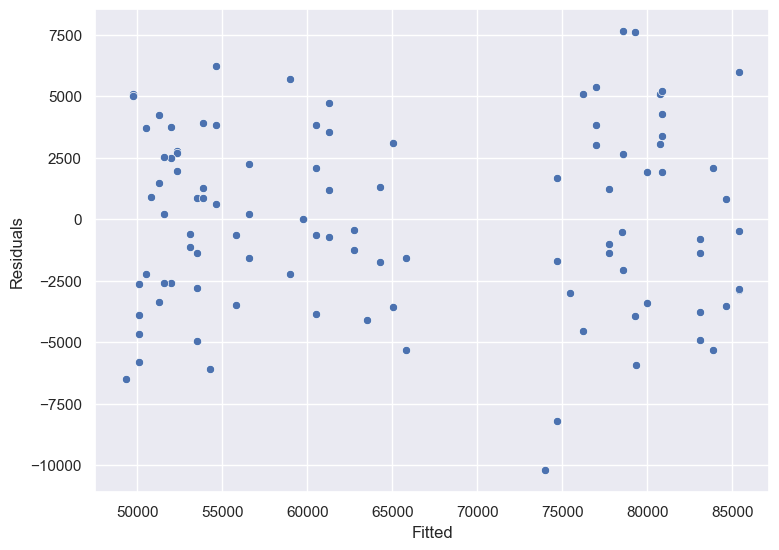

In [19]:
## Residuals for Model 2

residual2 = results_mod2.resid
fitted2 = results_mod2.fittedvalues

resid2_plot = sns.scatterplot(x = fitted2, 
                              y = residual2)
resid2_plot.set(xlabel='Fitted', 
                ylabel='Residuals')
resid2_plot;

## Extracting the intercept

print("Intercept =", (results_mod2.params['C(department)[T.sociology]'] + results_mod2.params['Intercept']))


## Extracting the slope

print("(experience) coef. =", results_mod2.params['experience'])


## Extracting the R-squared

print("R^2 =", results_mod2.rsquared_adj)



Let's inspect the qqplot

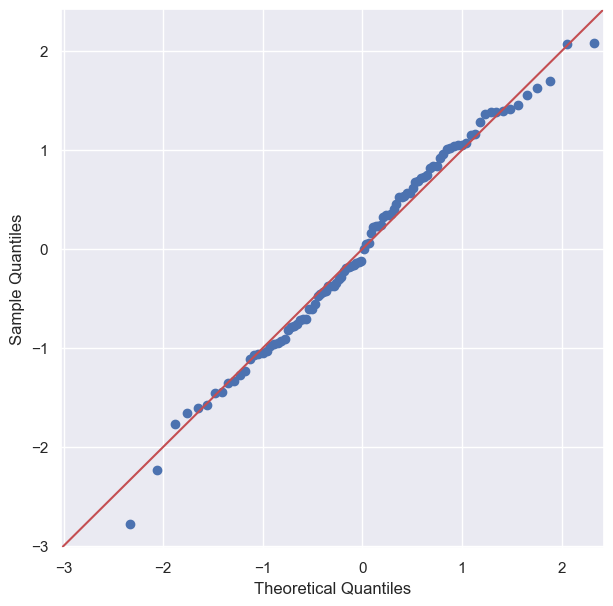

In [20]:
# Use statsmodels qqplot to graph errors
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))
# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.

sm.graphics.qqplot(residual2, line='45', fit=True, ax=ax);


Our residuals are looking better. There are some tails at the end, but overall the blue dots are following the red line. 


<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

**Model interpretation**

Interpret the model for the Sociology department (similar to the example in Model 1).

* **Intercept:** 
* **Slope:** 
* **Overall fit:**

</p>
</div>
 

In [21]:
# %load "./Solutions/ex2.4.py"
## Extracting the intercept

print("Intercept =", (results_mod2.params['C(department)[T.sociology]'] + results_mod2.params['Intercept']))


## Extracting the slope

print("(experience) coef. =", results_mod2.params['experience'])


## Extracting the R-squared

print("R^2 =", results_mod2.rsquared_adj)



# Model interpretation

## Intercept: The base salary for the sociology department from the line of best fit was 47800.2 USD.
## Slope: The rate at which salary increases with experience was estimated to be 755.5 USD per year based on the line of best fit.
## Overall fit: The model fit explained 91.8% of the variation in individual's salaries.

Intercept = 47800.20186457721
(experience) coef. = 755.5152142855056
R^2 = 0.9177865863237862


### Model 3: Interactions

**Hypothesis**: Each department has different starting salaries and salaries increase at different rates.

So far we've allowed the intercept in our model to vary by department. Let's try letting our slope change also with department. By allowing our slope to vary by department we are exploring the hypothesis that **how** `salary` **changes** with `experience` varies by department. 

To do this in the model, we need to use an interaction term. Interactions are included using the multiplication symbol $*$ between two variables.

In [22]:
## Specifying Model 3 and the resulting model fit

model3 = smf.ols(formula='salary ~ experience*C(department)', data=salaries)

results_mod3 = model3.fit()

print(results_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           2.65e-51
Time:                        14:34:24   Log-Likelihood:                -948.90
No. Observations:                 100   AIC:                             1918.
Df Residuals:                      90   BIC:                             1944.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

If we look at the results, we can see that the slope for `experience` also uses biology (the department name that is missing) as a baseline.


We can plot the model fit using our new coefficients. This time, both the slope and intercept will vary. 


274.73216745318086 313.92050330985194 1526.0579500530478 1941.1180412513193 389.5281924580611
51801.137774573 60856.981828940625 70406.95435976758 40923.70546817548 80453.25791418817


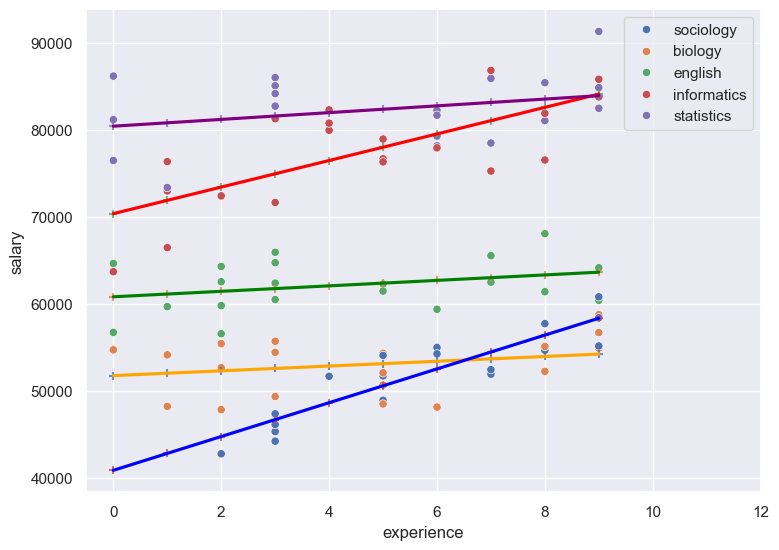

In [23]:
scatter_department = sns.scatterplot(data=salaries, x='experience', y='salary', hue='department')

x = np.arange(10)

##Slope
a1 = results_mod3.params['experience']
a2 = results_mod3.params['experience:C(department)[T.english]'] + results_mod3.params['experience']
a3 = results_mod3.params['experience:C(department)[T.informatics]'] + results_mod3.params['experience']
a4 = results_mod3.params['experience:C(department)[T.sociology]'] + results_mod3.params['experience']
a5 = results_mod3.params['experience:C(department)[T.statistics]'] + results_mod3.params['experience']

print(a1, a2, a3, a4, a5)

## Intercept
b1 = results_mod3.params['Intercept']
b2 = results_mod3.params['C(department)[T.english]'] + results_mod3.params['Intercept']
b3 = results_mod3.params['C(department)[T.informatics]'] + results_mod3.params['Intercept']
b4 = results_mod3.params['C(department)[T.sociology]'] + results_mod3.params['Intercept']
b5 = results_mod3.params['C(department)[T.statistics]'] + results_mod3.params['Intercept']

print(b1, b2, b3, b4, b5)

##Predicted Salary
y1 = a1*x + b1
y2 = a2*x + b2
y3 = a3*x + b3
y4 = a4*x + b4
y5 = a5*x + b5


## Line of best fit

scatter_department = sns.regplot(x = x, 
                                 y = y1, 
                                 marker= "+", 
                                 line_kws = {"color": "orange"})

scatter_department = sns.regplot(x = x, 
                                 y = y2, 
                                 marker = "+", 
                                 line_kws = {"color": "green"})

scatter_department = sns.regplot(x = x, 
                                 y = y3, 
                                 marker = "+", 
                                 line_kws = {"color": "red"})

scatter_department = sns.regplot(x = x, 
                                 y = y4, 
                                 marker = "+", 
                                 line_kws = {"color": "blue"})

scatter_department = sns.regplot(x = x, 
                                 y = y5, 
                                 marker = "+", 
                                 line_kws = {"color": "purple"})

scatter_department.set_xlim(left=-0.5, right=12)
plt.legend(loc='upper right');


<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

1. Which department gets the highest raises (biggest slope)?
2. Which department has the highest starting salary (biggest intercept)?

</p>
</div>



In [24]:
# %load "./Solutions/ex2.5.py"
## 1. Which department gets the highest raises (biggest slope)?


# Looking at the plot both the informatics department and the sociology department have steep positive slopes but it is difficult to tell by eye which has a higher slope (estimated yearly raise).

a3 = results_mod3.params['experience:C(department)[T.informatics]'] + results_mod3.params['experience']
a4 = results_mod3.params['experience:C(department)[T.sociology]'] + results_mod3.params['experience']

print('Informatics slope:', a3)
print('Sociology slope:', a4)

## Yearly raise: The sociology department has the highest estimated yearly raise with 1941.11 USD increase in pay per year. The informatics department has the second highest estimates yearly raise with 1526.05 USD increase in pay per year.

## 2. Which department has the highest starting salary (biggest intercept)?

# Looking at the plot the statistics department has the largest intercept (highest point crossing the y-axis). 

b5 = results_mod3.params['C(department)[T.statistics]'] + results_mod3.params['Intercept']

print('Statistics Intercept', b5)


## The starting salary is estimated at 80,453.3 USD.

Informatics slope: 1526.0579500530478
Sociology slope: 1941.1180412513193
Statistics Intercept 80453.25791418817


<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

**Model interpretation**

Interpret the model for the Informatics department (similar to the example in Model 1).

* **Intercept:** 
* **Slope:** 
* **Overall fit:**

</p>
</div>

### Making Predictions from our model

Now that we've settled on our best model, let's say that someone asked us the question:

What would be the salary of a professor who has worked in the biology department for 7 years?


In [25]:
# We can calculate this by plugging in 7 years into our model equation for biology
# (remember: biology is incorporated into the intercept)

results_mod3.params['experience']*7 + results_mod3.params['Intercept']

53724.262946745264

Now if someone asks us what would be the salary of a professor who has worked in the sociology department for 7 years we can approach it in the same way, but it will be a bit longer as our equations are in reference to a biology baseline. 

In [26]:
# We can calculate this by plugging in 7 years into our model equation for sociology
# Note that we have to combine the baseline slope with our slope for sociology
# We also have to combine our baseline intercept with our intercept for sociology

(results_mod3.params['experience'] + results_mod3.params['experience:C(department)[T.sociology]'])*7 + results_mod3.params['Intercept'] + results_mod3.params['C(department)[T.sociology]']

54511.53175693471

<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

1. What is the predicted salary of someone who works in the informatics department for 7 years?

</p>
</div>


In [27]:
# %load "./Solutions/ex2.6.py"
# We can calculate this by plugging in 7 years into our model equation for informatics
# Note that we have to combine the baseline slope with our slope for informatics
# We also have to combine our baseline intercept with our intercept for informatics

(results_mod3.params['experience'] + results_mod3.params['experience:C(department)[T.informatics]'])*7 + results_mod3.params['Intercept'] + results_mod3.params['C(department)[T.informatics]']

81089.36001013892

**Extrapolation**

When we make predictions for the salary, we want to make sure that we are not extrapolating beyond the data that we have observed. For instance, we can't with any confidence say what a professors salary will be in 20 years because we do not have any professors in our data set who have worked in a department for 20 years. It's important not to extrapolate in areas we have not measure or don't have data for because we don't know how our model will perform in that sample space. 

**Residuals Model 3**

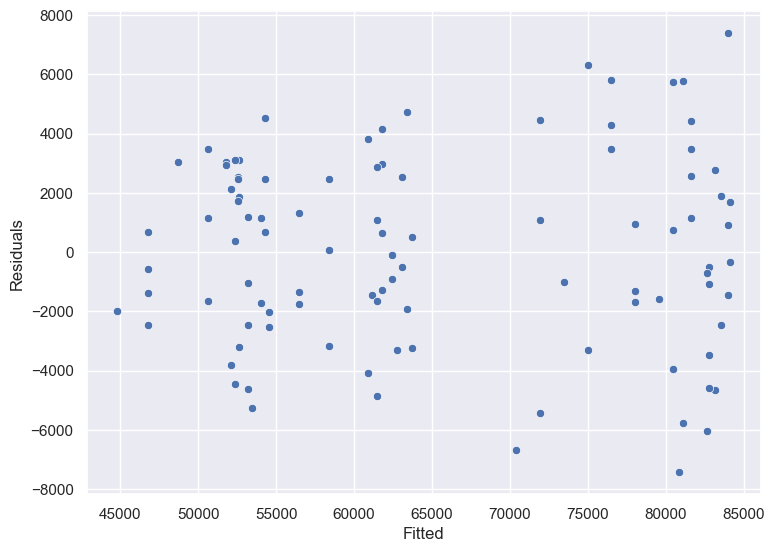

In [28]:
residual3 = results_mod3.resid
fitted3 = results_mod3.fittedvalues

resid3_plot = sns.scatterplot(x = fitted3, y = residual3)
resid3_plot.set(xlabel='Fitted', ylabel='Residuals');

**The qqplot for Model 3**

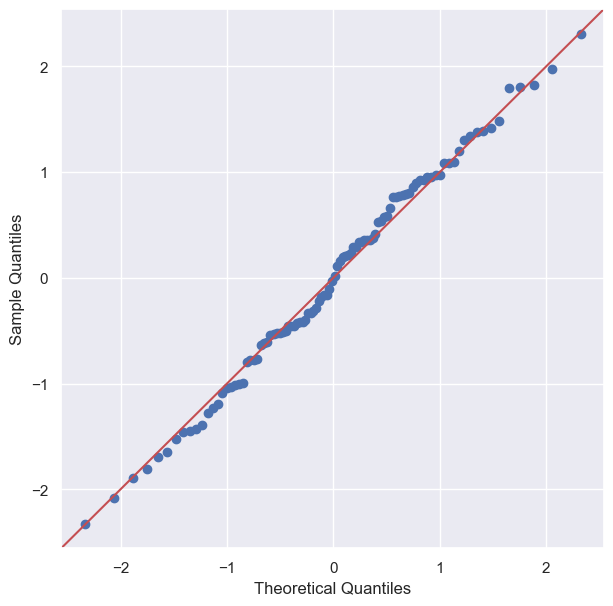

In [29]:
# Use statsmodels qqplot to graph errors
# make a figure and an axis
f, ax = plt.subplots(figsize=(7,7))
# call the qqplot graph from statsmodels 'graphics' module.
# fits against the normal distribution as standard.

sm.graphics.qqplot(residual3, line='45', fit=True, ax=ax);



## Model Comparison

So how can we decide which model is better? There are a few metrics we can compare between the model that can be found in the top table. The three main ones we will discuss in this course are the `Adjusted R^2`, `AIC`, and `BIC`. Before getting to these concepts, let's discuss the concept of `parsimony` and `Occam's Razor`.

**Occam's Razor: law of parsimony**

`Parsimony` (aka `Occam's razor`) is a general argument for choosing simpler models even though we know the world is complex. Occam's razor says that when presented with competing hypotheses that make the same predictions, we should select the solution with the fewest assumptions. This is to say that all other things being equal, we should prefer a simpler model to a more complex one, especially when the data don't tell a clear story. 

Model selection approaches often go beyond parsimony to say that a more complex model must not be just better than, but a specified amount better than, a simpler model.

**Practical Considerations**

There is also a practical element to parsimony; simple theories are easier to test than complex ones. Similarly, simple models often do a better job at predicting. Because a simpler model requires fewer parameters it is also less expensive in terms of time or money to collect the data for it. 

**We need to draw the line somewhere**

"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk" ~ John Von Neumann



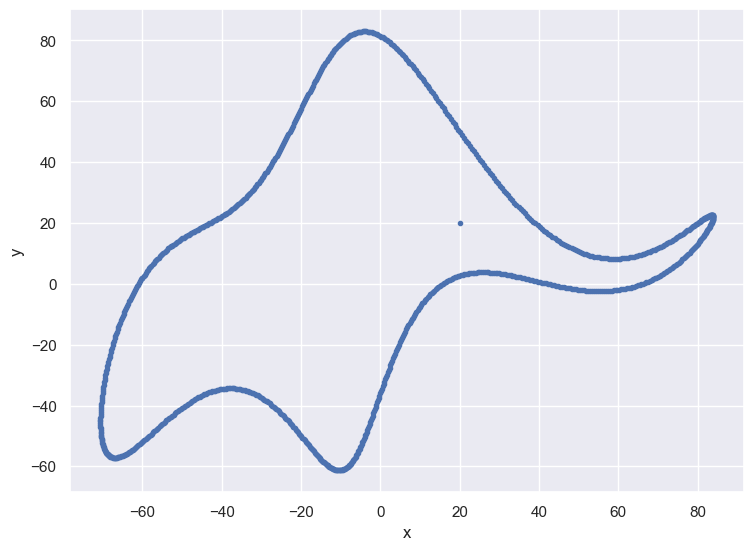

In [30]:
#Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)

#Based on a paper by:
#Drawing an elephant with four complex parameters
#Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
#Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017

# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
plt.plot(y,-x,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we add more parameters to a model, we necessarily get an increasingly accurate fit to the particular data we have observed (the bias of our predictions decreases), but our precision for predicting future observations decreases as well (the variance of our predictions increases). 

One way to think about it is that data contain a fixed amount of information; as we estimate more and more parameters we spread the data thinner and thinner. Eventually the gain in accuracy from having more details in the model is outweighed by the loss in precision from estimating the effect of each of those details more poorly.

**Adjusted R^2**

R-squared is a goodness-of-fit measure for linear regression models. It indicates the percentage of the variance in the response variable explained by the explanatory variables. It is calculated by:


$\frac{\text{Variance explained by the model}}{ \text{Total variance}}$. 

**Likelihood**

The `likelihood` is the probability of the observed outcome (i.e. the data) given a particular choice of parameters. For a particular statistical model, maximum likelihood finds the set of parameters *that makes the observed data most likely to have occurred*. That is, we find the set of parameters that makes the likelihood as large as possible.

<img src="../../images/likelihood_example.png"  width="800" height="800" alt="Maximum likelihood diagram.">

Image Credit: Ashan Priyadarshan. [Maximum likelihood](https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d)

The diagram above shows what is happening when you are calculating the maximum likelihood. Here, we have a line of best fit, with the estimated values of the response variable $\hat y_{1...n}$ (red dots). The actual values of the response variable (our data), are reperesented by the black dots. The residuals are indicated by the $\epsilon$. The residual is the distance between the actual value of the response variable and the estimated value of the response variable. 

When we are calculating the maximum likelihood, we are looking for the parameters that maximise the likelihood of the data. The horizontal arrows trace up to the normal distribution which represents the fit. The closer to the peak of the distribution the data falls the "more likely" the data is given the parameters. 

For mathematical convenience, we often work with the logarithm of the likelihood (the *log-likelihood*) instead of the likelihood. However, the parameters that give the maximum log-likelihood also give the maximum likelihood. 

**Information criteria**

**Information criteria** are based on the expected distance between a particular model and the "true" model. All information-theoretic methods reduce to finding the model that minimizes some criterion that is the sum of a term based on the likelihood (usually twice the negative log-likelihood) and a *penalty term* which is different for different information criteria. 

Selecting models based on information criteria allows for the comparison of all candidate models at once, provided they are fit to the same data. If there are missing values in certain variables and not others, the model will exclude these data when fitting by default, so you need to be careful that you are not comparing models which have been fit to different datasets. 


 * **AIC**
The `Akaike Information Criterion`, or AIC, is the most widespread information criterion, and is defined as

$\text{AIC} = -2L + 2k$

where $L$ is the log-likelihood and $k$ is the number of parameters in the model. As with all information criteria, small values represent better overall fits; adding a parameter with a negligible improvement in fit penalizes the AIC by 2 log-likelihood units.


**Some rough guidance for AIC**

1. Lower values of AIC indicated a better fit to the data regardless of whether they are positive or negative.
    * If you have two models with AIC: -213.09, and -289.12. The model with AIC -289.12 is better.
2. AIC comparisons are only valid for models that are fit to the same response data (i.e. same y)

For AIC, the rule of thumb people generally follow is that improvements of greater than 2 mean we can select the more complicated model.

* **BIC**
The second most common information criterion, the *Bayesian* information criterion (BIC), uses a penalty term of $(log n)k$. The BIC is more conservative than the AIC, insisting on a greater improvement in fit before it will accept a more complex model. 

**Model Selection when there are several possibilities**

Models with multiple parameters and possible interactions between variable lead to a large number of models to try. Two simple approaches to model selection include:

* **forward selection** (add parameters one at a time to the simplest model)
* **backward selection** (subtract parameters from the most complex model). 

With too large a set of possibilities this can mean that you may arrive at a different best model depending on which approach you take. There are some algorithms to do a combination or forward and backward selection. However, you want to be careful that this kind of model selection does not devolve into data-dredging. 

You should:

1. Use common sense and domain knowledge to isolate the most important comparisons
2. Draw plots of the best candidate fits to try to understand why different models fit the data approximately equally well. 

<div class="alert alert-block alert-success">
<b><font size="4"> Exercises: </font> </b> 
<p> 

1. Let's compare the models we ran using Adjusted R^2 and AIC. Using the notes above, discuss in groups or write a paragraph about which model you think is best and why?

2. Take a look at the main parameters of Model 2 and Model 3 from the model summary tables. Do they seem to vary much between the models?

</p>
</div>

In [31]:
# %load "./Solutions/ex2.7.py"
# 1. Let's compare the models we ran using Adjusted R^2 and AIC. Using the notes above, discuss in groups or write a paragraph about which model you think is best and why?

print("Adjusted R^2 Model 1 = ", results_mod1.rsquared_adj, 
      "\nAdjusted R^2 Model 2 = ", results_mod2.rsquared_adj, 
      "\nAdjusted R^2 Model 3 = ", results_mod3.rsquared_adj)

## Model 3 explains the most variation out of the models with 93.5% of the variation in salary explained compared to 91.8% of variation in salary explained by Model 2.  Model 3 also has the lowest AIC 1917.8 compared to 1937.6 for Model 2. 

print("AIC Model 1 = ", results_mod1.aic, 
      "\nAIC Model 2 = ", results_mod2.aic, 
      "\nAIC Model 3 = ", results_mod3.aic)

#2. Take a look at the main parameters of Model 2 and Model 3 from the model summary tables. Do they seem to vary much between the models?

## Model 2

b1 = results_mod2.params['Intercept'] # biology
b2 = results_mod2.params['C(department)[T.english]'] + results_mod2.params['Intercept'] # english
b3 = results_mod2.params['C(department)[T.informatics]']  + results_mod2.params['Intercept'] # informatics
b4 = results_mod2.params['C(department)[T.sociology]'] + results_mod2.params['Intercept'] # sociology
b5 = results_mod2.params['C(department)[T.statistics]']  + results_mod2.params['Intercept'] # statistics

print(b1, b2, b3, b4, b5)


## The starting salary (intercept) ranges from 47800.20-78568.42 USD. 
## The yearly raise (slope) is the same for all departments and is 755.52 USD.


## Model 3

##Slope
a1 = results_mod3.params['experience']
a2 = results_mod3.params['experience:C(department)[T.english]'] + results_mod3.params['experience']
a3 = results_mod3.params['experience:C(department)[T.informatics]'] + results_mod3.params['experience']
a4 = results_mod3.params['experience:C(department)[T.sociology]'] + results_mod3.params['experience']
a5 = results_mod3.params['experience:C(department)[T.statistics]'] + results_mod3.params['experience']

print(a1, a2, a3, a4, a5)

## The slope (yearly raises) varies between 274.73 and 1941.12 USD per year.


## Intercept
b1 = results_mod3.params['Intercept']
b2 = results_mod3.params['C(department)[T.english]'] + results_mod3.params['Intercept']
b3 = results_mod3.params['C(department)[T.informatics]'] + results_mod3.params['Intercept']
b4 = results_mod3.params['C(department)[T.sociology]'] + results_mod3.params['Intercept']
b5 = results_mod3.params['C(department)[T.statistics]'] + results_mod3.params['Intercept']

print(b1, b2, b3, b4, b5)

## The intercept (starting salary) varies between 40923.71 and 80453.26 USD per year. 


## Comparing the two models the intercepts (starting salary) ranges do not vary greatly, however, the yearly raises vary quite a lot between Model 3 and Model 2. If we were interested in comparing department starting salaries between the model we could subtract the intercept estimated in model 3 by the intercept estimated in model 2 to see the difference. 

## The starting salary in biology was 2067.37 higher in model 3 compared to model 2

print(results_mod3.params['Intercept'] - results_mod2.params['Intercept'])

## The yearly raise in biology was estimated to be 480.78 USD per year lower in model 3 compared to model 2

print(results_mod3.params['experience']-results_mod2.params['experience'])


Adjusted R^2 Model 1 =  0.012348448482915608 
Adjusted R^2 Model 2 =  0.9177865863237862 
Adjusted R^2 Model 3 =  0.9349987583834514
AIC Model 1 =  2182.409691980974 
AIC Model 2 =  1937.6412740676572 
AIC Model 3 =  1917.801552808499
49733.770673194056 58980.20430729415 73951.45094429825 47800.20186457721 78568.4247517769
274.73216745318086 313.92050330985194 1526.0579500530478 1941.1180412513193 389.5281924580611
51801.137774573 60856.981828940625 70406.95435976758 40923.70546817548 80453.25791418817
2067.3671013789426
-480.78304683232477


**Adjusted R^2**

In [32]:
## Model Comparison: Comparing Adjusted R^2
## \n will put the results on the next line!

print("Adjusted R^2 Model 1 = ", results_mod1.rsquared_adj, 
      "\nAdjusted R^2 Model 2 = ", results_mod2.rsquared_adj, 
      "\nAdjusted R^2 Model 3 = ", results_mod3.rsquared_adj)


Adjusted R^2 Model 1 =  0.012348448482915608 
Adjusted R^2 Model 2 =  0.9177865863237862 
Adjusted R^2 Model 3 =  0.9349987583834514


**AIC**

In [33]:
print("AIC Model 1 = ", results_mod1.aic, 
      "\nAIC Model 2 = ", results_mod2.aic, 
      "\nAIC Model 3 = ", results_mod3.aic)


AIC Model 1 =  2182.409691980974 
AIC Model 2 =  1937.6412740676572 
AIC Model 3 =  1917.801552808499


<div class="alert alert-block alert-success">
<b><font size="4"> Next Chapter: Generalised Linear Models</font> </b> 
<p> 
In the next chapter we will extend the modelling basics we have learned here into more advanced linear model types.
</p>
</div>